In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [41]:
irisdf = pd.read_csv('iris.csv')
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
X = irisdf.drop('species',axis=1)

In [43]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
XS[1:5]

array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [46]:
#Finding the optimum number of clusters for k-means classification
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

C:\Users\zeeha\anaconda3\envs\python-r\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


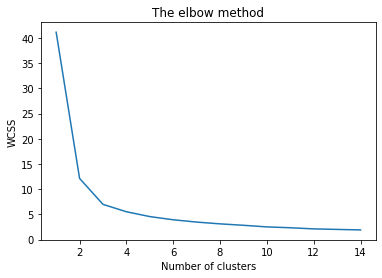

In [47]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

In [49]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Plotting any two features for visualization

Text(0.5, 1.0, 'The actual dataset')

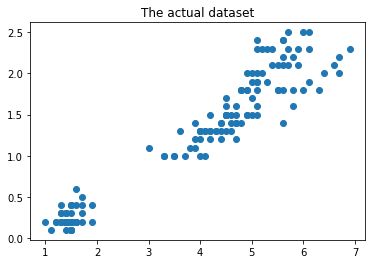

In [51]:
plt.scatter(x=X.petal_length,y=X.petal_width)
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

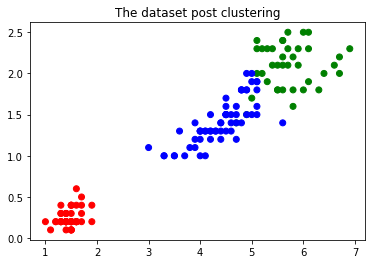

In [53]:
#After the clustering
#adding the colors
color2=np.array(['green','red','blue'])
plt.scatter(x=X.petal_length,y=X.petal_width,c=color2[kmeans.labels_])
plt.title("The dataset post clustering")

#### Another Visual

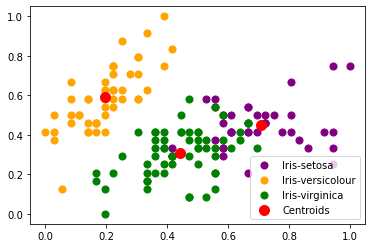

In [58]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

### More Analysis to find distinguishing and interesting features in each cluster. You can also use good visualizations to show differences

In [61]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

In [65]:
C1['petal_length'].mean()

5.702564102564101

In [66]:
C2['petal_length'].mean()

1.464

In [67]:
C3['petal_length'].mean()

4.39672131147541

#### C1 can be named as Big Blossoms, C2 can be named as Tiny Shiny etc.